# (Homework) Week 6 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:** Dan Ahimbisibwe\
**Email:** Da3658@nyu.edu

---

### Problem 1: Dataset Splitting

1. You have recordings of 44 phones from 100 people; each person records ~200 phones/day for 5 days.
   - Design a valid training/validation/test split strategy that ensures the model generalizes to **new speakers**.

2. You now receive an additional dataset of 10,000 phone recordings from **Kilian**, a single speaker.
   - You must train a model that performs well **specifically for Kilian**, while also maintaining generalization.

*Describe your proposed split strategy and reasoning.* (Theory)

In [12]:
problem_1_answer = """Generalization to unseen speakers:
- Split by speaker ID so no speaker appears in multiple sets. Use 70 speakers for training, 15 for validation, and 15 for testing.
- Ensure balanced phone distribution across splits using stratified sampling by speaker groups.
- Compute all normalization statistics and data augmentation parameters from training speakers only.
- Use speaker-grouped cross-validation during training to prevent overfitting to specific speakers.
- Validate model performance exclusively on unseen speakers to confirm true generalization.

Adapting for Kilian while preserving generalization:
- Maintain original 100-speaker splits unchanged to measure generalization performance.
- Split Kilian's 10,000 recordings into Kilian-train (7,000), Kilian-validation (1,500), and Kilian-test (1,500) sets.
- Pre-train model on the original 70-speaker training set for broad generalization.
- Fine-tune using mixed batches: primarily Kilian-train data with some original training data to maintain generalization.
- Consider adding a lightweight speaker-adaptation layer specifically for Kilian's characteristics.
- Monitor both validation sets: original speaker validation (generalization) and Kilian-validation (personalization).
- Stop training when Kilian-validation performance plateaus to avoid overfitting.
- Final evaluation reports both metrics: generalization on original test speakers and personalized performance on Kilian-test set."""
print(problem_1_answer)

Generalization to unseen speakers:
- Split by speaker ID so no speaker appears in multiple sets. Use 70 speakers for training, 15 for validation, and 15 for testing.
- Ensure balanced phone distribution across splits using stratified sampling by speaker groups.
- Compute all normalization statistics and data augmentation parameters from training speakers only.
- Use speaker-grouped cross-validation during training to prevent overfitting to specific speakers.
- Validate model performance exclusively on unseen speakers to confirm true generalization.

Adapting for Kilian while preserving generalization:
- Maintain original 100-speaker splits unchanged to measure generalization performance.
- Split Kilian's 10,000 recordings into Kilian-train (7,000), Kilian-validation (1,500), and Kilian-test (1,500) sets.
- Pre-train model on the original 70-speaker training set for broad generalization.
- Fine-tune using mixed batches: primarily Kilian-train data with some original training data to mai

### Problem 2: K-Nearest Neighbors

1. **1-NN Classification:** Given dataset:

   Positive: (1,2), (1,4), (5,4)

   Negative: (3,1), (3,2)

   Plot the 1-NN decision boundary and classify new points visually.

2. **Feature Scaling:** Consider dataset:

   Positive: (100,2), (100,4), (500,4)

   Negative: (300,1), (300,2)

   What would the 1-NN classify point (500,1) as **before and after scaling** to [0,1] per feature?

3. **Handling Missing Values:** How can you modify K-NN to handle missing features in a test point?

4. **High-dimensional Data:** Why can K-NN still work well for images even with thousands of pixels?


Prediction for [500   1] before scaling: positive
Prediction for [500   1] after scaling to [0, 1]: negative
Handling Missing Values in K-NN:
- Partial Distance Method: Calculate distance using only dimensions where both points have values
- Feature Imputation: Replace missing values with mean/median from training data before distance calculation  
- Distance Weighting: Scale distances by the proportion of available features to avoid bias
- Advanced Approaches: Use k-nearest neighbors imputation or probabilistic distance measures

High-Dimensional Image Data:
- Curse of Dimensionality: Distances become less meaningful in very high dimensions
- But Images Have Structure: Natural images lie on lower-dimensional manifolds within pixel space
- Preprocessing Helps: PCA, autoencoders, or learned embeddings compress to meaningful features
- Semantic Similarity: Nearby images often share content despite high dimensionality
- Practical Success: With sufficient data and proper preprocessing, loc

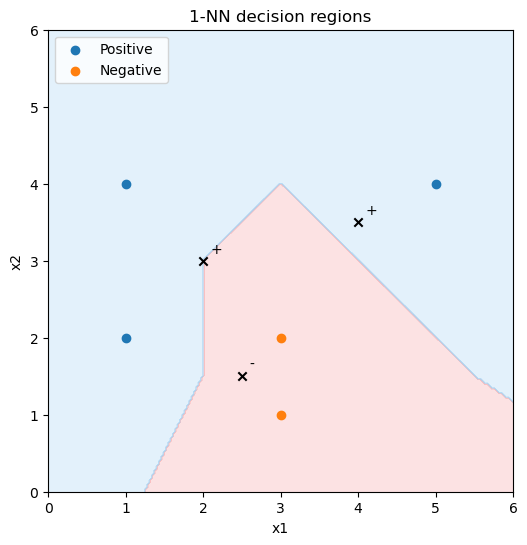

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Part 1: 1-NN decision regions
positive = np.array([[1, 2], [1, 4], [5, 4]])
negative = np.array([[3, 1], [3, 2]])
X = np.vstack([positive, negative])
y = np.array([1] * len(positive) + [0] * len(negative))

def predict_1nn(point, samples, labels):
    distances = np.linalg.norm(samples - point, axis=1)
    return labels[np.argmin(distances)]

grid_x, grid_y = np.meshgrid(np.linspace(0, 6, 200), np.linspace(0, 6, 200))
grid_points = np.c_[grid_x.ravel(), grid_y.ravel()]
grid_pred = np.array([predict_1nn(pt, X, y) for pt in grid_points]).reshape(grid_x.shape)

cmap = ListedColormap(["#f8a1a4", "#a3d2f2"])
fig, ax = plt.subplots(figsize=(6, 6))
ax.contourf(grid_x, grid_y, grid_pred, alpha=0.3, cmap=cmap)
ax.scatter(positive[:, 0], positive[:, 1], c="tab:blue", label="Positive")
ax.scatter(negative[:, 0], negative[:, 1], c="tab:orange", label="Negative")

new_samples = np.array([[2, 3], [4, 3.5], [2.5, 1.5]])
for pt in new_samples:
    label = predict_1nn(pt, X, y)
    ax.scatter(pt[0], pt[1], marker="x", c="k")
    ax.text(pt[0] + 0.1, pt[1] + 0.1, "+" if label == 1 else "-", fontsize=10)

ax.set_title("1-NN decision regions")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.legend(loc="upper left")
ax.set_xlim(0, 6)
ax.set_ylim(0, 6)

# Part 2: effect of feature scaling
positive_2 = np.array([[100, 2], [100, 4], [500, 4]])
negative_2 = np.array([[300, 1], [300, 2]])
X2 = np.vstack([positive_2, negative_2])
y2 = np.array([1] * len(positive_2) + [0] * len(negative_2))
query = np.array([500, 1])

def min_max_scale(data):
    min_vals = data.min(axis=0)
    max_vals = data.max(axis=0)
    scale = np.where(max_vals > min_vals, max_vals - min_vals, 1.0)
    return (data - min_vals) / scale, min_vals, scale

pred_before = "positive" if predict_1nn(query, X2, y2) == 1 else "negative"

X2_scaled, min_vals, scale = min_max_scale(X2)
query_scaled = (query - min_vals) / scale
pred_after = "positive" if predict_1nn(query_scaled, X2_scaled, y2) == 1 else "negative"

print(f"Prediction for {query} before scaling: {pred_before}")
print(f"Prediction for {query} after scaling to [0, 1]: {pred_after}")

discussion = """Handling Missing Values in K-NN:
- Partial Distance Method: Calculate distance using only dimensions where both points have values
- Feature Imputation: Replace missing values with mean/median from training data before distance calculation  
- Distance Weighting: Scale distances by the proportion of available features to avoid bias
- Advanced Approaches: Use k-nearest neighbors imputation or probabilistic distance measures

High-Dimensional Image Data:
- Curse of Dimensionality: Distances become less meaningful in very high dimensions
- But Images Have Structure: Natural images lie on lower-dimensional manifolds within pixel space
- Preprocessing Helps: PCA, autoencoders, or learned embeddings compress to meaningful features
- Semantic Similarity: Nearby images often share content despite high dimensionality
- Practical Success: With sufficient data and proper preprocessing, local neighborhoods maintain semantic coherence
- Alternative Metrics: Cosine similarity often works better than Euclidean distance for high-dimensional data"""
print(discussion)


### Problem 3: Part 1

You are given a fully trained Perceptron model with weight vector **w**, along with training set **D_TR** and test set **D_TE**.

1. Your co-worker suggests evaluating $h(x) = sign(w \cdot x)$ for every $(x, y)$ in D_TR and D_TE. Does this help determine whether test error is higher than training error?
2. Why is there no need to compute training error explicitly for the Perceptron algorithm?

In [14]:
problem_3_part1 = """1. Evaluating h(x) = sign(w.x) on both D_TR and D_TE and comparing predictions to true labels does help determine whether test error is higher than training error. For a converged perceptron on linearly separable data, training error is zero by construction, so computing it again serves mainly as a sanity check.

2. There is no need to compute training error explicitly for the Perceptron algorithm because the convergence theorem guarantees zero training error for linearly separable data, and the algorithm stops only when all training points are correctly classified."""
print(problem_3_part1)


1. Evaluating h(x) = sign(w.x) on both D_TR and D_TE and comparing predictions to true labels does help determine whether test error is higher than training error. For a converged perceptron on linearly separable data, training error is zero by construction, so computing it again serves mainly as a sanity check.

2. There is no need to compute training error explicitly for the Perceptron algorithm because the convergence theorem guarantees zero training error for linearly separable data, and the algorithm stops only when all training points are correctly classified.


### Problem 3: Two-point 2D Dataset (Part 2)

Run the Perceptron algorithm **by hand or in code** on the following data:

1. Positive class: (10, -2)
2. Negative class: (12, 2)

Start with $w_0 = (0, 0)$ and a learning rate of 1.

- Compute how many updates are required until convergence.
- Write down the sequence of $w_i$ vectors.

In [15]:
import numpy as np

X = np.array([[10, -2], [12, 2]], dtype=float)
y = np.array([1, -1], dtype=int)

w = np.zeros(2, dtype=float)
history = []
max_epochs = 100

print(f"w_0 = {w}")

for epoch in range(max_epochs):
    mistakes = 0
    for xi, yi in zip(X, y):
        margin = yi * np.dot(w, xi)
        if margin <= 0:
            w = w + yi * xi
            history.append(w.copy())
            mistakes += 1
    if mistakes == 0:
        break

print("Number of updates until convergence:", len(history))
for idx, vec in enumerate(history, start=1):
    print(f"w_{idx} = {vec}")


w_0 = [0. 0.]
Number of updates until convergence: 9
w_1 = [10. -2.]
w_2 = [-2. -4.]
w_3 = [ 8. -6.]
w_4 = [-4. -8.]
w_5 = [  6. -10.]
w_6 = [ -6. -12.]
w_7 = [  4. -14.]
w_8 = [ -8. -16.]
w_9 = [  2. -18.]


### Problem 4: Reconstructing the Weight Vector

Given the log of Perceptron updates:

| x | y | count |
|---|---|--------|
| (0, 0, 0, 0, 4) | +1 | 2 |
| (0, 0, 6, 5, 0) | +1 | 1 |
| (3, 0, 0, 0, 0) | -1 | 1 |
| (0, 9, 3, 6, 0) | -1 | 1 |
| (0, 1, 0, 2, 5) | -1 | 1 |

Assume learning rate = 1 and initial weight $w_0 = (0, 0, 0, 0, 0)$.

Compute the final weight vector after all updates.

In [16]:
import numpy as np

update_log = [
    ((0, 0, 0, 0, 4), 1, 2),
    ((0, 0, 6, 5, 0), 1, 1),
    ((3, 0, 0, 0, 0), -1, 1),
    ((0, 9, 3, 6, 0), -1, 1),
    ((0, 1, 0, 2, 5), -1, 1),
]

w = np.zeros(5, dtype=int)
for x, y, count in update_log:
    x = np.array(x)
    w += count * y * x

print("Final weight vector:", w)


Final weight vector: [ -3 -10   3  -3   3]


### Problem 5: Visualizing Perceptron Convergence

Implement a Perceptron on a small 2D dataset with positive and negative examples.

- Plot the data points.
- After each update, visualize the decision boundary.
- Show how it converges to a stable separator.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Linearly separable toy dataset
X = np.array([
    [1.0, 4.0],
    [2.0, 3.5],
    [2.5, 4.5],
    [3.5, 1.0],
    [4.0, 2.0],
    [4.5, 2.5],
])
y = np.array([1, 1, 1, -1, -1, -1])

# Add bias term so the hyperplane is w0*x + w1*y + b = 0
X_aug = np.hstack([X, np.ones((X.shape[0], 1))])
w = np.zeros(3)
weights = [w.copy()]

max_epochs = 50
for epoch in range(max_epochs):
    mistakes = 0
    for xi, yi in zip(X_aug, y):
        margin = yi * np.dot(w, xi)
        if margin <= 0:
            w = w + yi * xi
            weights.append(w.copy())
            mistakes += 1
    if mistakes == 0:
        break

cols = len(weights)
fig, axes = plt.subplots(1, cols, figsize=(4 * cols, 4), sharex=True, sharey=True)
if cols == 1:
    axes = [axes]

x_vals = np.linspace(0, 5, 200)
for ax, weight in zip(axes, weights):
    ax.scatter(X[y == 1, 0], X[y == 1, 1], color="tab:blue", label="Positive")
    ax.scatter(X[y == -1, 0], X[y == -1, 1], color="tab:orange", label="Negative")
    if not np.allclose(weight[:2], 0.0) and abs(weight[1]) > 1e-8:
        ax.plot(x_vals, -(weight[0] * x_vals + weight[2]) / weight[1], color="k")
    ax.set_title(f"w = {np.round(weight, 2)}")
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 5)
    ax.grid(True, alpha=0.2)

axes[0].legend(loc="upper right")
fig.suptitle("Perceptron convergence across updates", y=1.02)
plt.tight_layout()
